In [5]:
# IMDB 데이터셋 로드하기

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000)

In [6]:
# 데이터셋 확인하기
print(train_data[0])  # 단어 목록
print(train_labels[0]) # 레이블- 0:부정, 1: 긍정
max([max(sequence) for sequence in train_data])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


9999

In [7]:
# 영어 단어로 되돌리기

word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' ' .join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
# 번역 다시보기

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [13]:
# 정수 시퀀스를 이진 행렬로 인코딩하기

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
# 변환 값 확인
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [15]:
# 레이블 바꾸기

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
# 신경망 모델 정의하기

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [17]:
# 모델 컴파일하기
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [18]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [19]:
# 손실과 측정을 함수 객체로 지정하기

from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [20]:
# 검증 세트 준비하기

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
# 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 1:32 - loss: 0.6939 - binary_accuracy: 0.5020

 1024/15000 [=>............................] - ETA: 45s - loss: 0.6918 - binary_accuracy: 0.5322 

 1536/15000 [==>...........................] - ETA: 29s - loss: 0.6848 - binary_accuracy: 0.5482

 2048/15000 [===>..........................] - ETA: 21s - loss: 0.6751 - binary_accuracy: 0.5967

 3072/15000 [=====>........................] - ETA: 13s - loss: 0.6532 - binary_accuracy: 0.6452

 4096/15000 [=======>......................] - ETA: 9s - loss: 0.6424 - binary_accuracy: 0.6421 

 5120/15000 [=========>....................] - ETA: 7s - loss: 0.6225 - binary_accuracy: 0.6746

 6144/15000 [===========>..................] - ETA: 5s - loss: 0.6062 - binary_accuracy: 0.6943

 6656/15000 [============>.................] - ETA: 4s - loss: 0.5992 - binary_accuracy: 0.7028

 7168/15000 [=============>................] - ETA: 4s - loss: 0.5913 - binary_accuracy: 0.7111

 7680/15000 [==============>...............] - ETA: 3s - loss: 0.5816 - binary_accuracy: 0.7211

 8192/15000 [===============>..............] - ETA: 3s - loss: 0.5755 - binary_accuracy: 0.7273

 9216/15000 [=================>............] - ETA: 2s - loss: 0.5651 - binary_accuracy: 0.7378

 9728/15000 [==================>...........] - ETA: 2s - loss: 0.5609 - binary_accuracy: 0.7407

10240/15000 [===================>..........] - ETA: 1s - loss: 0.5553 - binary_accuracy: 0.7461

10752/15000 [====================>.........] - ETA: 1s - loss: 0.5505 - binary_accuracy: 0.7495

11776/15000 [======================>.......] - ETA: 1s - loss: 0.5392 - binary_accuracy: 0.7588

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5284 - binary_accuracy: 0.7672

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5190 - binary_accuracy: 0.7737

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5144 - binary_accuracy: 0.7769

15000/15000 [==============================] - 6s 374us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.3235 - binary_accuracy: 0.9062

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.3322 - binary_accuracy: 0.9102

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.3230 - binary_accuracy: 0.9102

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3176 - binary_accuracy: 0.9138

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3119 - binary_accuracy: 0.9130

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3090 - binary_accuracy: 0.9135

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3073 - binary_accuracy: 0.9100

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3123 - binary_accuracy: 0.9052

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3115 - binary_accuracy: 0.9042

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3097 - binary_accuracy: 0.9046

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3083 - binary_accuracy: 0.9061

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3065 - binary_accuracy: 0.9057

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3040 - binary_accuracy: 0.9048

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3028 - binary_accuracy: 0.9040

14848/15000 [============================>.] - ETA: 0s - loss: 0.3007 - binary_accuracy: 0.9046

15000/15000 [==============================] - 2s 141us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.2119 - binary_accuracy: 0.9355

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.2228 - binary_accuracy: 0.9316

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.2192 - binary_accuracy: 0.9359

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2249 - binary_accuracy: 0.9300

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2215 - binary_accuracy: 0.9327

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2230 - binary_accuracy: 0.9316

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2211 - binary_accuracy: 0.9323

 7168/15000 [=============>................] - ETA: 0s - loss: 0.2216 - binary_accuracy: 0.9316

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2219 - binary_accuracy: 0.9293

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2227 - binary_accuracy: 0.9277

10240/15000 [===================>..........] - ETA: 0s - loss: 0.2203 - binary_accuracy: 0.9285

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2210 - binary_accuracy: 0.9277

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2215 - binary_accuracy: 0.9268

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2193 - binary_accuracy: 0.9278

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2182 - binary_accuracy: 0.9282

15000/15000 [==============================] - 2s 144us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1951 - binary_accuracy: 0.9375

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1895 - binary_accuracy: 0.9382

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1854 - binary_accuracy: 0.9422

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1765 - binary_accuracy: 0.9478

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1757 - binary_accuracy: 0.9490

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1771 - binary_accuracy: 0.9473

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1752 - binary_accuracy: 0.9476

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1740 - binary_accuracy: 0.9486

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1727 - binary_accuracy: 0.9482

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1718 - binary_accuracy: 0.9484

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1737 - binary_accuracy: 0.9467

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1750 - binary_accuracy: 0.9448

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1770 - binary_accuracy: 0.9433

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1764 - binary_accuracy: 0.9436

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1762 - binary_accuracy: 0.9437

14848/15000 [============================>.] - ETA: 0s - loss: 0.1753 - binary_accuracy: 0.9437

15000/15000 [==============================] - 2s 149us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1320 - binary_accuracy: 0.9688

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1438 - binary_accuracy: 0.9616

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1379 - binary_accuracy: 0.9633

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1358 - binary_accuracy: 0.9651

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1355 - binary_accuracy: 0.9644

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1373 - binary_accuracy: 0.9631

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1416 - binary_accuracy: 0.9593

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1414 - binary_accuracy: 0.9586

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1396 - binary_accuracy: 0.9586

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1394 - binary_accuracy: 0.9586

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1406 - binary_accuracy: 0.9570

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1412 - binary_accuracy: 0.9564

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1413 - binary_accuracy: 0.9555

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1429 - binary_accuracy: 0.9544

14848/15000 [============================>.] - ETA: 0s - loss: 0.1425 - binary_accuracy: 0.9542

15000/15000 [==============================] - 2s 150us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1232 - binary_accuracy: 0.9668

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1155 - binary_accuracy: 0.9688

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1054 - binary_accuracy: 0.9723

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1069 - binary_accuracy: 0.9713

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1126 - binary_accuracy: 0.9698

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1156 - binary_accuracy: 0.9675

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1154 - binary_accuracy: 0.9674

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1164 - binary_accuracy: 0.9663

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1162 - binary_accuracy: 0.9653

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1155 - binary_accuracy: 0.9652

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1153 - binary_accuracy: 0.9649

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1146 - binary_accuracy: 0.9649

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1149 - binary_accuracy: 0.9648

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1154 - binary_accuracy: 0.9646

14848/15000 [============================>.] - ETA: 0s - loss: 0.1149 - binary_accuracy: 0.9650

15000/15000 [==============================] - 2s 149us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_binary_accuracy: 0.8772


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1028 - binary_accuracy: 0.9707

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1008 - binary_accuracy: 0.9701

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0958 - binary_accuracy: 0.9746

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0940 - binary_accuracy: 0.9746

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0912 - binary_accuracy: 0.9753

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0901 - binary_accuracy: 0.9760

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0917 - binary_accuracy: 0.9748

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0942 - binary_accuracy: 0.9736

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0957 - binary_accuracy: 0.9724

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0972 - binary_accuracy: 0.9719

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0974 - binary_accuracy: 0.9717

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0973 - binary_accuracy: 0.9712

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0972 - binary_accuracy: 0.9712

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0979 - binary_accuracy: 0.9707

14848/15000 [============================>.]

 - ETA: 0s - loss: 0.0981 - binary_accuracy: 0.9704

15000/15000 [==============================] - 2s 143us/step - loss: 0.0980 - binary_accuracy: 0.9705 - val_loss: 0.3127 - val_binary_accuracy: 0.8846


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0727 - binary_accuracy: 0.9844

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0710 - binary_accuracy: 0.9818

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0690 - binary_accuracy: 0.9836

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0729 - binary_accuracy: 0.9805

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0757 - binary_accuracy: 0.9787

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0749 - binary_accuracy: 0.9789

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0751 - binary_accuracy: 0.9787

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0746 - binary_accuracy: 0.9790

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0758 - binary_accuracy: 0.9786

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0786 - binary_accuracy: 0.9772

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0803 - binary_accuracy: 0.9766

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0797 - binary_accuracy: 0.9769

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0797 - binary_accuracy: 0.9767

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0790 - binary_accuracy: 0.9771

14848/15000 [============================>.] - ETA: 0s - loss: 0.0796 - binary_accuracy: 0.9768

15000/15000 [==============================] - 2s 147us/step - loss: 0.0807 - binary_accuracy: 0.9763 - val_loss: 0.3859 - val_binary_accuracy: 0.8649


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0833 - binary_accuracy: 0.9746

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0654 - binary_accuracy: 0.9831

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0594 - binary_accuracy: 0.9871

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0589 - binary_accuracy: 0.9877

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0596 - binary_accuracy: 0.9874

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0627 - binary_accuracy: 0.9856

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0614 - binary_accuracy: 0.9860

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0615 - binary_accuracy: 0.9858

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0621 - binary_accuracy: 0.9852

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0637 - binary_accuracy: 0.9842

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0669 - binary_accuracy: 0.9824

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0670 - binary_accuracy: 0.9822

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0673 - binary_accuracy: 0.9822

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0666 - binary_accuracy: 0.9823

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0659 - binary_accuracy: 0.9824

15000/15000 [==============================] - 2s 152us/step - loss: 0.0661 - binary_accuracy: 0.9821 - val_loss: 0.3635 - val_binary_accuracy: 0.8782


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0553 - binary_accuracy: 0.9922

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0508 - binary_accuracy: 0.9922

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0518 - binary_accuracy: 0.9915

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0514 - binary_accuracy: 0.9907

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0523 - binary_accuracy: 0.9893

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0534 - binary_accuracy: 0.9886

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0530 - binary_accuracy: 0.9888

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0526 - binary_accuracy: 0.9891



 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0524 - binary_accuracy: 0.9885

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0525 - binary_accuracy: 0.9883

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0511 - binary_accuracy: 0.9892

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0520 - binary_accuracy: 0.9892

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0518 - binary_accuracy: 0.9889

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0515 - binary_accuracy: 0.9889

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0525 - binary_accuracy: 0.9882

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0546 - binary_accuracy: 0.9871

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0572 - binary_accuracy: 0.9854

13312/15000 [=========================>....]

 - ETA: 0s - loss: 0.0566 - binary_accuracy: 0.9854

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0557 - binary_accuracy: 0.9858

15000/15000 [==============================] - 2s 152us/step - loss: 0.0561 - binary_accuracy: 0.9853 - val_loss: 0.3843 - val_binary_accuracy: 0.8792


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0405 - binary_accuracy: 0.9922

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0322 - binary_accuracy: 0.9967

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0363 - binary_accuracy: 0.9949

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0353 - binary_accuracy: 0.9953

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0341 - binary_accuracy: 0.9950

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0356 - binary_accuracy: 0.9940

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0354 - binary_accuracy: 0.9941

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0359 - binary_accuracy: 0.9940

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0380 - binary_accuracy: 0.9929

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0420 - binary_accuracy: 0.9907

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0423 - binary_accuracy: 0.9903

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0426 - binary_accuracy: 0.9899

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0431 - binary_accuracy: 0.9898

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0433 - binary_accuracy: 0.9898

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0432 - binary_accuracy: 0.9899

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0440 - binary_accuracy: 0.9893

15000/15000 [==============================] - 2s 147us/step - loss: 0.0439 - binary_accuracy: 0.9893 - val_loss: 0.4153 - val_binary_accuracy: 0.8779


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0291 - binary_accuracy: 0.9961

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0277 - binary_accuracy: 0.9974

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0274 - binary_accuracy: 0.9977

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0276 - binary_accuracy: 0.9969

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0273 - binary_accuracy: 0.9973

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0286 - binary_accuracy: 0.9967

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0329 - binary_accuracy: 0.9947



 6656/15000 [============>.................] - ETA: 0s - loss: 0.0336 - binary_accuracy: 0.9944

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0335 - binary_accuracy: 0.9944

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0329 - binary_accuracy: 0.9947

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0328 - binary_accuracy: 0.9945

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0330 - binary_accuracy: 0.9944

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0331 - binary_accuracy: 0.9947

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0337 - binary_accuracy: 0.9945

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0335 - binary_accuracy: 0.9945

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0338 - binary_accuracy: 0.9943

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0346 - binary_accuracy: 0.9936

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0373 - binary_accuracy: 0.9923

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0377 - binary_accuracy: 0.9923

14848/15000 [============================>.] - ETA: 0s - loss: 0.0381 - binary_accuracy: 0.9922

15000/15000 [==============================] - 2s 153us/step - loss: 0.0381 - binary_accuracy: 0.9921 - val_loss: 0.4525 - val_binary_accuracy: 0.8690


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0254 - binary_accuracy: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0251 - binary_accuracy: 0.9980

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0279 - binary_accuracy: 0.9957

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0260 - binary_accuracy: 0.9964

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0249 - binary_accuracy: 0.9970

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0239 - binary_accuracy: 0.9970

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0244 - binary_accuracy: 0.9965

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0256 - binary_accuracy: 0.9956

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0253 - binary_accuracy: 0.9960

 9728/15000 [==================>...........]

 - ETA: 0s - loss: 0.0256 - binary_accuracy: 0.9957

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0263 - binary_accuracy: 0.9953

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0281 - binary_accuracy: 0.9941

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0300 - binary_accuracy: 0.9929

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0302 - binary_accuracy: 0.9926

14848/15000 [============================>.] - ETA: 0s - loss: 0.0301 - binary_accuracy: 0.9927

15000/15000 [==============================] - 2s 147us/step - loss: 0.0300 - binary_accuracy: 0.9928 - val_loss: 0.4698 - val_binary_accuracy: 0.8729


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0179 - binary_accuracy: 0.9980

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0189 - binary_accuracy: 0.9974

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0181 - binary_accuracy: 0.9977

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0189 - binary_accuracy: 0.9972

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0187 - binary_accuracy: 0.9972

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0188 - binary_accuracy: 0.9971

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0191 - binary_accuracy: 0.9972

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0194 - binary_accuracy: 0.9972

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0190 - binary_accuracy: 0.9974

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0192 - binary_accuracy: 0.9973

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0208 - binary_accuracy: 0.9964

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0252 - binary_accuracy: 0.9938

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0253 - binary_accuracy: 0.9939

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0252 - binary_accuracy: 0.9941

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0249 - binary_accuracy: 0.9942

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0249 - binary_accuracy: 0.9944

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0249 - binary_accuracy: 0.9944

14848/15000 [============================>.] - ETA: 0s - loss: 0.0248 - binary_accuracy: 0.9945

15000/15000 [==============================] - 2s 150us/step - loss: 0.0247 - binary_accuracy: 0.9945 - val_loss: 0.5023 - val_binary_accuracy: 0.8726


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0103 - binary_accuracy: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0145 - binary_accuracy: 0.9980

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0141 - binary_accuracy: 0.9980

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0147 - binary_accuracy: 0.9983

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0145 - binary_accuracy: 0.9985

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0147 - binary_accuracy: 0.9988

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0148 - binary_accuracy: 0.9986

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0150 - binary_accuracy: 0.9986

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0155 - binary_accuracy: 0.9984

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0160 - binary_accuracy: 0.9985

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0164 - binary_accuracy: 0.9984

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0166 - binary_accuracy: 0.9984

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0170 - binary_accuracy: 0.9982

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0179 - binary_accuracy: 0.9978

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0176 - binary_accuracy: 0.9979

14848/15000 [============================>.] - ETA: 0s - loss: 0.0176 - binary_accuracy: 0.9979

15000/15000 [==============================] - 2s 147us/step - loss: 0.0175 - binary_accuracy: 0.9979 - val_loss: 0.5342 - val_binary_accuracy: 0.8693


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0180 - binary_accuracy: 0.9941

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0139 - binary_accuracy: 0.9974

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0128 - binary_accuracy: 0.9984

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0122 - binary_accuracy: 0.9989

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0124 - binary_accuracy: 0.9988

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0124 - binary_accuracy: 0.9989

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0120 - binary_accuracy: 0.9990

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0121 - binary_accuracy: 0.9991

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0121 - binary_accuracy: 0.9992

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0121 - binary_accuracy: 0.9992

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0122 - binary_accuracy: 0.9990

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0134 - binary_accuracy: 0.9989

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0149 - binary_accuracy: 0.9983

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0150 - binary_accuracy: 0.9984

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0149 - binary_accuracy: 0.9983

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0149 - binary_accuracy: 0.9983

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0147 - binary_accuracy: 0.9983

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0147 - binary_accuracy: 0.9983

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0145 - binary_accuracy: 0.9983

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0144 - binary_accuracy: 0.9983

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0146 - binary_accuracy: 0.9983

14848/15000 [============================>.] - ETA: 0s - loss: 0.0149 - binary_accuracy: 0.9982

15000/15000 [==============================] - 2s 157us/step - loss: 0.0149 - binary_accuracy: 0.9983 - val_loss: 0.5710 - val_binary_accuracy: 0.8697


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0090 - binary_accuracy: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0081 - binary_accuracy: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0078 - binary_accuracy: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0078 - binary_accuracy: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0079 - binary_accuracy: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0082 - binary_accuracy: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0081 - binary_accuracy: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0082 - binary_accuracy: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0087 - binary_accuracy: 0.9995

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0095 - binary_accuracy: 0.9993

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0152 - binary_accuracy: 0.9967

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0163 - binary_accuracy: 0.9964

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0159 - binary_accuracy: 0.9967

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0155 - binary_accuracy: 0.9970

14848/15000 [============================>.] - ETA: 0s - loss: 0.0151 - binary_accuracy: 0.9970

15000/15000 [==============================] - 2s 142us/step - loss: 0.0151 - binary_accuracy: 0.9971 - val_loss: 0.6024 - val_binary_accuracy: 0.8697


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0075 - binary_accuracy: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0066 - binary_accuracy: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0063 - binary_accuracy: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0064 - binary_accuracy: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0064 - binary_accuracy: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0064 - binary_accuracy: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0063 - binary_accuracy: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0062 - binary_accuracy: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0061 - binary_accuracy: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0060 - binary_accuracy: 1.0000

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0062 - binary_accuracy: 1.0000

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0064 - binary_accuracy: 0.9998

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0067 - binary_accuracy: 0.9997

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0069 - binary_accuracy: 0.9997

14848/15000 [============================>.] - ETA: 0s - loss: 0.0074 - binary_accuracy: 0.9996

15000/15000 [==============================] - 2s 141us/step - loss: 0.0075 - binary_accuracy: 0.9996 - val_loss: 0.6789 - val_binary_accuracy: 0.8632


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0161 - binary_accuracy: 0.9980

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0120 - binary_accuracy: 0.9987

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0093 - binary_accuracy: 0.9992

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0080 - binary_accuracy: 0.9994

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0079 - binary_accuracy: 0.9993

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0071 - binary_accuracy: 0.9995

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0069 - binary_accuracy: 0.9995

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0066 - binary_accuracy: 0.9996

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0065 - binary_accuracy: 0.9995

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0065 - binary_accuracy: 0.9996

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0064 - binary_accuracy: 0.9996

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0063 - binary_accuracy: 0.9996

12288/15000 [=======================>......]

 - ETA: 0s - loss: 0.0064 - binary_accuracy: 0.9997

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0071 - binary_accuracy: 0.9995

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0111 - binary_accuracy: 0.9978

15000/15000 [==============================] - 2s 144us/step - loss: 0.0118 - binary_accuracy: 0.9975 - val_loss: 0.6698 - val_binary_accuracy: 0.8680


Epoch 20/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0042 - binary_accuracy: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0040 - binary_accuracy: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0041 - binary_accuracy: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0041 - binary_accuracy: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0041 - binary_accuracy: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0039 - binary_accuracy: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0038 - binary_accuracy: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0038 - binary_accuracy: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0037 - binary_accuracy: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0040 - binary_accuracy: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0041 - binary_accuracy: 0.9999

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0040 - binary_accuracy: 0.9999

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0041 - binary_accuracy: 0.9998

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0041 - binary_accuracy: 0.9999

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0041 - binary_accuracy: 0.9999

15000/15000 [==============================] - 2s 144us/step - loss: 0.0041 - binary_accuracy: 0.9999 - val_loss: 0.6931 - val_binary_accuracy: 0.8654


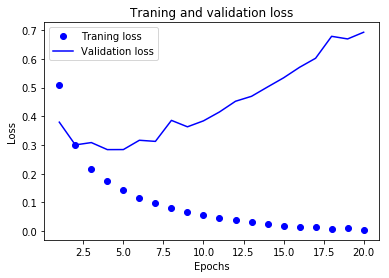

In [23]:
# 훈련과 검증 손실 그리기

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Traning loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

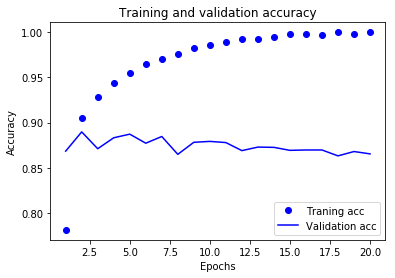

In [28]:
# 훈련과 검증 정확도 그리기
plt.clf()

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
# 모델을 처음부터 다시 훈련하기

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


  512/25000 [..............................] - ETA: 14s - loss: 0.6871 - acc: 0.5234

 1536/25000 [>.............................] - ETA: 6s - loss: 0.6718 - acc: 0.6283 

 2048/25000 [=>............................] - ETA: 5s - loss: 0.6651 - acc: 0.6191

 3072/25000 [==>...........................] - ETA: 4s - loss: 0.6455 - acc: 0.6543

 4096/25000 [===>..........................] - ETA: 3s - loss: 0.6301 - acc: 0.6709

 4608/25000 [====>.........................] - ETA: 3s - loss: 0.6228 - acc: 0.6803

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.6061 - acc: 0.7013

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.5981 - acc: 0.7116

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.5899 - acc: 0.7225

 7168/25000 [=======>......................] - ETA: 2s - loss: 0.5824 - acc: 0.7310

 8192/25000 [========>.....................] - ETA: 2s - loss: 0.5688 - acc: 0.7434

 9216/25000 [==========>...................] - ETA: 2s - loss: 0.5587 - acc: 0.7534

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.5537 - acc: 0.7593

10240/25000 [===========>..................] - ETA: 1s - loss: 0.5492 - acc: 0.7632

11264/25000 [============>.................] - ETA: 1s - loss: 0.5394 - acc: 0.7704

11776/25000 [=============>................] - ETA: 1s - loss: 0.5352 - acc: 0.7733

12288/25000 [=============>................] - ETA: 1s - loss: 0.5318 - acc: 0.7755

13312/25000 [==============>...............] - ETA: 1s - loss: 0.5221 - acc: 0.7826

13824/25000 [===============>..............] - ETA: 1s - loss: 0.5176 - acc: 0.7852

14336/25000 [================>.............] - ETA: 1s - loss: 0.5142 - acc: 0.7874

15360/25000 [=================>............] - ETA: 1s - loss: 0.5047 - acc: 0.7934

16384/25000 [==================>...........] - ETA: 0s - loss: 0.4973 - acc: 0.7974

16896/25000 [===================>..........] - ETA: 0s - loss: 0.4943 - acc: 0.7992

17408/25000 [===================>..........] - ETA: 0s - loss: 0.4910 - acc: 0.8008

18432/25000 [=====================>........] - ETA: 0s - loss: 0.4836 - acc: 0.8053

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4797 - acc: 0.8079

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4744 - acc: 0.8100

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4688 - acc: 0.8131

21504/25000 [========================>.....] - ETA: 0s - loss: 0.4665 - acc: 0.8137

22528/25000 [==========================>...] - ETA: 0s - loss: 0.4616 - acc: 0.8162

23552/25000 [===========================>..] - ETA: 0s - loss: 0.4559 - acc: 0.8193

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4524 - acc: 0.8214

24576/25000 [============================>.] - ETA: 0s - loss: 0.4492 - acc: 0.8233

25000/25000 [==============================] - 3s 109us/step - loss: 0.4470 - acc: 0.8242


Epoch 2/4
  512/25000 [..............................] - ETA: 2s - loss: 0.2735 - acc: 0.9238

 1024/25000 [>.............................] - ETA: 2s - loss: 0.2809 - acc: 0.9170

 2048/25000 [=>............................] - ETA: 2s - loss: 0.2783 - acc: 0.9194

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.2688 - acc: 0.9234

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.2683 - acc: 0.9215

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.2693 - acc: 0.9199

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.2698 - acc: 0.9149

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2719 - acc: 0.9142

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2740 - acc: 0.9108

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2744 - acc: 0.9095

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2709 - acc: 0.9098

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2700 - acc: 0.9090

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2678 - acc: 0.9092

11776/25000 [=============>................] - ETA: 1s - loss: 0.2678 - acc: 0.9087

12800/25000 [==============>...............] - ETA: 1s - loss: 0.2669 - acc: 0.9085

13824/25000 [===============>..............] - ETA: 1s - loss: 0.2653 - acc: 0.9091

14848/25000 [================>.............] - ETA: 0s - loss: 0.2626 - acc: 0.9098

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2616 - acc: 0.9101

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2620 - acc: 0.9100

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2621 - acc: 0.9101

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2607 - acc: 0.9100

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2609 - acc: 0.9091

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2603 - acc: 0.9092

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2588 - acc: 0.9094

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2577 - acc: 0.9098

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2565 - acc: 0.9102

24576/25000 [============================>.] - ETA: 0s - loss: 0.2560 - acc: 0.9103

25000/25000 [==============================] - 2s 90us/step - loss: 0.2557 - acc: 0.9103


Epoch 3/4
  512/25000 [..............................] - ETA: 2s - loss: 0.2236 - acc: 0.9219

 1536/25000 [>.............................] - ETA: 2s - loss: 0.2054 - acc: 0.9316

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.2025 - acc: 0.9352

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2040 - acc: 0.9325

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2015 - acc: 0.9321

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2007 - acc: 0.9331

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1968 - acc: 0.9340

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1943 - acc: 0.9344

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1967 - acc: 0.9330

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1950 - acc: 0.9334

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1948 - acc: 0.9337

11776/25000 [=============>................] - ETA: 1s - loss: 0.1944 - acc: 0.9338

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1937 - acc: 0.9341

13824/25000 [===============>..............] - ETA: 1s - loss: 0.1918 - acc: 0.9348

14848/25000 [================>.............] - ETA: 0s - loss: 0.1919 - acc: 0.9347

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1922 - acc: 0.9338

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1941 - acc: 0.9332

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1943 - acc: 0.9328

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1956 - acc: 0.9320

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1960 - acc: 0.9312

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1963 - acc: 0.9310

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1964 - acc: 0.9307

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1967 - acc: 0.9309

24064/25000 [===========================>..]

 - ETA: 0s - loss: 0.1965 - acc: 0.9308

25000/25000 [==============================] - 2s 89us/step - loss: 0.1969 - acc: 0.9305


Epoch 4/4


  512/25000 [..............................] - ETA: 2s - loss: 0.1481 - acc: 0.9590

 1536/25000 [>.............................] - ETA: 2s - loss: 0.1649 - acc: 0.9453

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1619 - acc: 0.9449

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1594 - acc: 0.9475

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1594 - acc: 0.9477

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1607 - acc: 0.9451

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1615 - acc: 0.9461

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1654 - acc: 0.9435

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1665 - acc: 0.9426

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1655 - acc: 0.9437

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1641 - acc: 0.9432

11776/25000 [=============>................] - ETA: 1s - loss: 0.1644 - acc: 0.9428

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1630 - acc: 0.9437

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1634 - acc: 0.9429

14848/25000 [================>.............] - ETA: 0s - loss: 0.1649 - acc: 0.9417

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1659 - acc: 0.9412

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1650 - acc: 0.9417

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1648 - acc: 0.9419

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1648 - acc: 0.9418

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1650 - acc: 0.9421

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1648 - acc: 0.9424

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1645 - acc: 0.9425

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1643 - acc: 0.9426

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1643 - acc: 0.9426

25000/25000 [==============================] - 2s 87us/step - loss: 0.1645 - acc: 0.9423


   32/25000 [..............................] - ETA: 43s

  448/25000 [..............................]

 - ETA: 6s 

  832/25000 [..............................] - ETA: 4s

 1216/25000 [>.............................] - ETA: 4s

 1600/25000 [>.............................] - ETA: 3s

 1984/25000 [=>............................] - ETA: 3s

 2368/25000 [=>............................] - ETA: 3s

 2752/25000 [==>...........................] - ETA: 3s

 3104/25000 [==>...........................] - ETA: 3s

 3520/25000 [===>..........................] - ETA: 3s

 3904/25000 [===>..........................] - ETA: 3s

 4288/25000 [====>.........................] - ETA: 3s

 4640/25000 [====>.........................] - ETA: 3s

 4992/25000 [====>.........................] - ETA: 2s

 5376/25000 [=====>........................] - ETA: 2s

 5760/25000 [=====>........................] - ETA: 2s

 6144/25000 [======>.......................] - ETA: 2s

 6528/25000 [======>.......................] - ETA: 2s

 6912/25000 [=======>......................] - ETA: 2s

 7296/25000 [=======>......................] - ETA: 2s

 7680/25000 [========>.....................] - ETA: 2s

 8064/25000 [========>.....................] - ETA: 2s

 8448/25000 [=========>....................] - ETA: 2s

 8832/25000 [=========>....................] - ETA: 2s

 9216/25000 [==========>...................] - ETA: 2s

 9600/25000 [==========>...................] - ETA: 2s

 9984/25000 [==========>...................] - ETA: 2s

10368/25000 [===========>..................] - ETA: 2s

10752/25000 [===========>..................] - ETA: 2s

11136/25000 [============>.................] - ETA: 1s

11488/25000 [============>.................] - ETA: 1s

11840/25000 [=============>................] - ETA: 1s

12224/25000 [=============>................] - ETA: 1s

12608/25000 [==============>...............] - ETA: 1s

12992/25000 [==============>...............] - ETA: 1s

13376/25000 [===============>..............] - ETA: 1s

13760/25000 [===============>..............] - ETA: 1s

14144/25000 [===============>..............] - ETA: 1s

14496/25000 [================>.............] - ETA: 1s

14880/25000 [================>.............] - ETA: 1s

15264/25000 [=================>............] - ETA: 1s

15648/25000 [=================>............] - ETA: 1s

16032/25000 [==================>...........] - ETA: 1s

16384/25000 [==================>...........] - ETA: 1s

16736/25000 [===================>..........] - ETA: 1s

17088/25000 [===================>..........] - ETA: 1s

17472/25000 [===================>..........] - ETA: 1s

17856/25000 [====================>.........] - ETA: 1s

18208/25000 [====================>.........] - ETA: 0s

18560/25000 [=====================>........] - ETA: 0s

18912/25000 [=====================>........] - ETA: 0s

19264/25000 [======================>.......] - ETA: 0s

19616/25000 [======================>.......] - ETA: 0s

19968/25000 [======================>.......] - ETA: 0s

20352/25000 [=======================>......] - ETA: 0s

20736/25000 [=======================>......] - ETA: 0s

21120/25000 [========================>.....] - ETA: 0s

21504/25000 [========================>.....] - ETA: 0s

21888/25000 [=========================>....] - ETA: 0s

22272/25000 [=========================>....] - ETA: 0s

22656/25000 [==========================>...] - ETA: 0s

23040/25000 [==========================>...] - ETA: 0s

23392/25000 [===========================>..] - ETA: 0s

23744/25000 [===========================>..] - ETA: 0s

24128/25000 [===========================>..] - ETA: 0s

24512/25000 [============================>.] - ETA: 0s

24896/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 4s 142us/step


In [31]:
# 훈련된 모델로 새로운 데이터에 대해 예측하기

model.predict(x_test)

array([[0.29397124],
       [0.99968123],
       [0.93757635],
       ...,
       [0.16675381],
       [0.15830693],
       [0.7685168 ]], dtype=float32)